In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
data_directory = 'changed_dataset'  # main directory path
classes = os.listdir(data_directory)
num_classes = len(classes)
image_size = (128, 128) 
#arrays
images = []
labels = []

for label, class_name in enumerate(classes):
    class_directory = os.path.join(data_directory, class_name)
    for image_file in os.listdir(class_directory):
        image_path = os.path.join(class_directory, image_file)
        img = load_img(image_path, target_size=image_size)
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(label)

#numpy arrrays.
images = np.array(images)
labels = np.array(labels)

In [4]:
#data generation using augmentation.
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmented_images = []
augmented_labels = []


for image, label in zip(images, labels):

    image = image.reshape((1,) + image.shape)
   
    aug_iter = datagen.flow(image, batch_size=1)

    for i in range(50):  
        augmented_image = aug_iter.next()[0]
        augmented_images.append(augmented_image)
        augmented_labels.append(label)


augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

all_images = np.concatenate((images, augmented_images))
all_labels = np.concatenate((labels, augmented_labels))


In [5]:
augmented_images.size,augmented_labels.size

(245760000, 5000)

In [6]:
# X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.25, random_state=42, stratify=all_labels)

# X_train = X_train / 255.0
# X_test = X_test / 255.0

# y_train = to_categorical(y_train, num_classes)
# y_test = to_categorical(y_test, num_classes)

Epoch 1/65
120/120 [==============================] - 94s 772ms/step - loss: 11.6574 - val_loss: 14.7649
Epoch 2/65
120/120 [==============================] - 91s 758ms/step - loss: 8.9195 - val_loss: 13.6261
Epoch 3/65
120/120 [==============================] - 86s 717ms/step - loss: 8.3995 - val_loss: 13.4239
Epoch 4/65
120/120 [==============================] - 90s 753ms/step - loss: 7.2731 - val_loss: 11.5578
Epoch 5/65
120/120 [==============================] - 94s 781ms/step - loss: 7.6161 - val_loss: 10.3489
Epoch 6/65
120/120 [==============================] - 92s 766ms/step - loss: 6.1099 - val_loss: 9.2606
Epoch 7/65
120/120 [==============================] - 92s 767ms/step - loss: 5.4047 - val_loss: 10.3329
Epoch 8/65
120/120 [==============================] - 92s 766ms/step - loss: 4.9499 - val_loss: 9.1736
Epoch 9/65
120/120 [==============================] - 99s 823ms/step - loss: 3.9727 - val_loss: 8.4200
Epoch 10/65
120/120 [==============================] - 96s 799ms/s

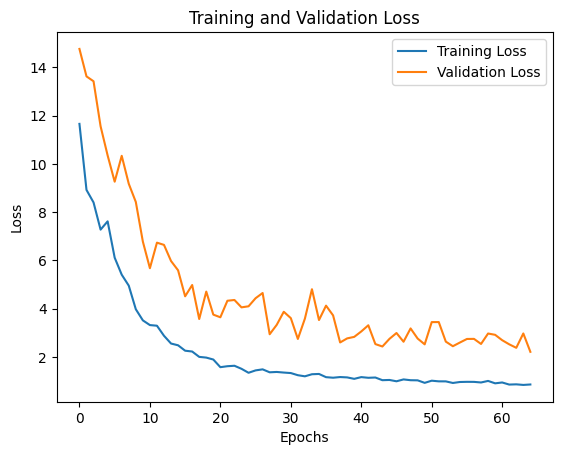

In [21]:
#regrestion
from tensorflow.keras.layers import Dropout  # Importing the Dropout layer(important)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.25, random_state=42, stratify=all_labels)

# Normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Building the regression model
regression_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
        Dropout(0.25),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
        Dropout(0.25),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
        Dropout(0.25),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1)  # Output layer for regression
])

regression_model.compile(optimizer='adam', loss='mean_squared_error')


############
########

# Training the regression model
history = regression_model.fit(X_train, y_train, epochs=65, batch_size=32, validation_data=(X_test, y_test))

# the loss graph plot here!
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [8]:
# Training the regression model
# history = regression_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))



In [9]:
# history,history.shape


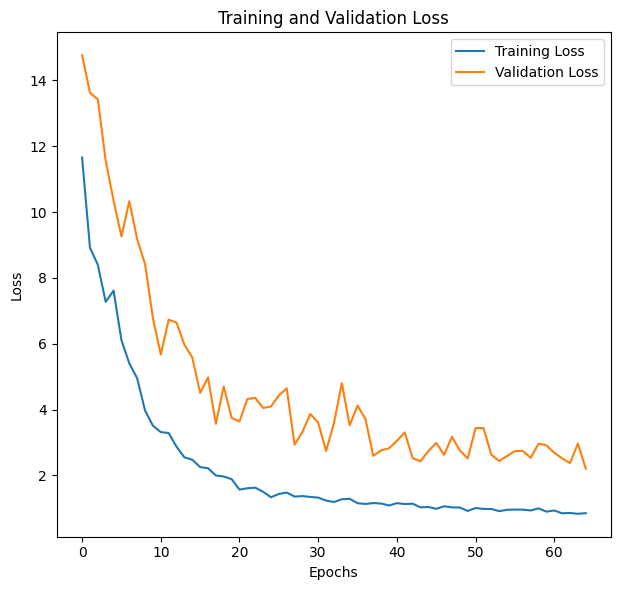

In [25]:
# Plotting the loss graph
plt.figure(figsize=(12, 6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting the training and validation accuracy
# plt.subplot(1, 2, 2)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.legend()

plt.tight_layout()
plt.show()


40/40 [==============================] - 6s 144ms/step


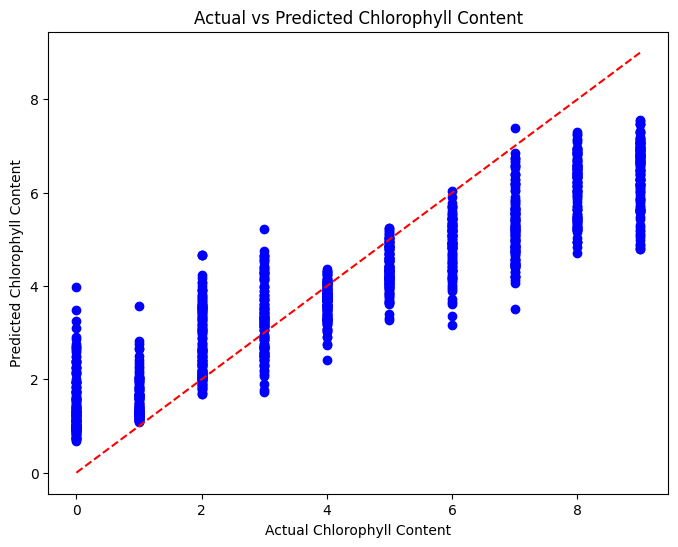

In [26]:
# Predicting chlorophyll content for test set
y_pred = regression_model.predict(X_test)

# Plotting actual vs predicted chlorophyll content
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Chlorophyll Content')
plt.ylabel('Predicted Chlorophyll Content')
plt.title('Actual vs Predicted Chlorophyll Content')
plt.show()


40/40 [==============================] - 6s 156ms/step


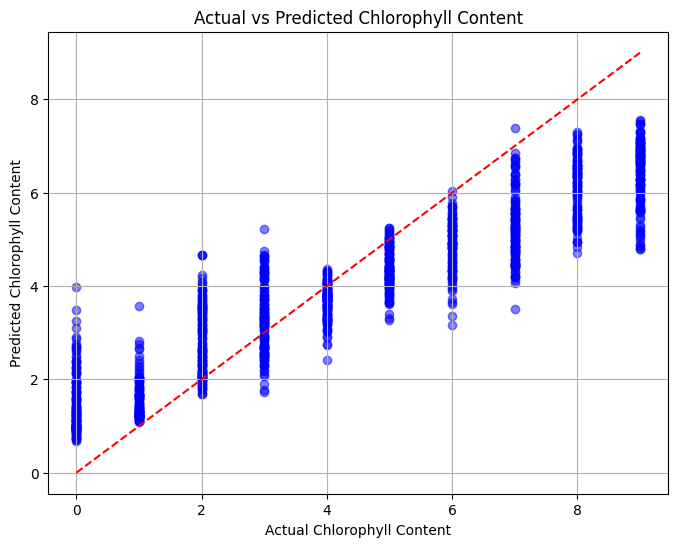

In [27]:
# Predicting chlorophyll content for test set
y_pred = regression_model.predict(X_test)

# Plotting actual vs predicted chlorophyll content
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Chlorophyll Content')
plt.ylabel('Predicted Chlorophyll Content')
plt.title('Actual vs Predicted Chlorophyll Content')
plt.grid(True)
plt.show()


In [1]:
from sklearn.metrics import r2_score

# Predicting chlorophyll content for test set
y_pred = regression_model.predict(X_test)

# Calculating R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 score: {r2:.2f}')


NameError: name 'regression_model' is not defined

In [29]:
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.metrics import r2_score
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.optimizers import Adam

# # Building the regression model with dropout layers and L2 regularization
# regression_model = Sequential([
#     Conv2D(8, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
#     MaxPooling2D((2, 2)),
#     Dropout(16.25),  
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Dropout(0.25),  
#     Conv2D(32, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Dropout(0.25),  
#     Flatten(),
#     Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
#     Dropout(0.5),  
#     Dense(1)  
# ])

# # Using Adam optimizer with a lower learning rate
# optimizer = Adam(learning_rate=0.0001)

# regression_model.compile(optimizer=optimizer, loss='mean_squared_error')

# # Implementing early stopping to prevent overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Training the regression model
# history = regression_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# # Predicting chlorophyll content for test set
# y_pred = regression_model.predict(X_test)

# # Calculating R^2 score
# r2 = r2_score(y_test, y_pred)
# print(f'R^2 score: {r2:.2f}')


In [30]:
# #CNN Model.
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(num_classes, activation='softmax')
# ])

In [31]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [32]:
# model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


In [33]:
# loss, accuracy = model.evaluate(X_test, y_test)
# print("Test Loss:", loss)
# print("Test Accuracy:", accuracy)

In [34]:
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import itertools

# predictions = np.argmax(model.predict(X_test), axis=1)


# true_labels = np.argmax(y_test, axis=1)


# cm = confusion_matrix(true_labels, predictions)

# plt.figure(figsize=(8, 6))
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.colorbar()
# tick_marks = np.arange(len(classes))
# plt.xticks(tick_marks, classes, rotation=45)
# plt.yticks(tick_marks, classes)


# cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# thresh = cm.max() / 2.
# for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#     plt.text(j, i, format(cm[i, j], 'd'),
#              horizontalalignment="center",
#              color="white" if cm[i, j] > thresh else "black")

# plt.tight_layout()
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.show()


In [35]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# accuracy = accuracy_score(true_labels, predictions)
# print("Accuracy:", accuracy)

# precision = precision_score(true_labels, predictions, average='weighted')
# print("Precision:", precision)

# recall = recall_score(true_labels, predictions, average='weighted')
# print("Recall:", recall)

# f1 = f1_score(true_labels, predictions, average='weighted')
# print("F1-score:", f1)

# report = classification_report(true_labels, predictions, target_names=classes)
# print("Classification Report:")
# print(report)
